In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

from math import sqrt
#importing necessary libraries

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#since the quality attribute is not a binary variable, such as good/bad, win/lose, 
#we do not use classification tasks. Hence we can use different regressor algorithms to predict the quality

In [5]:
#first step is data preprocessing where we check for outliers
data.shape

(1599, 12)

In [6]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#visualizing the data
import seaborn as sns
sns.distplot(data['quality'])

C:\Users\MY-PC\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


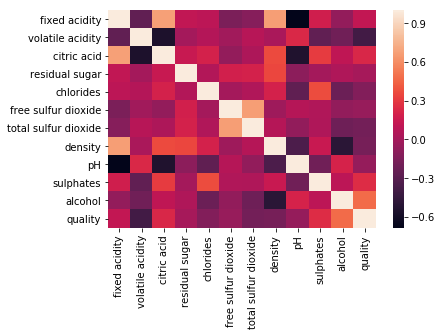

In [9]:
sns.heatmap(data.corr())

In [ ]:
#to further preprocess the dataset we can check linear relation btw each pair of variables, and remove the 
#variable which is linearly related with the other variable. In this way the dataset size gets reduced, but the necessary 
#variables are still available

In [10]:
#selecting i/p and o/p variables for regression tasks
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
target = ['quality']

In [11]:
X = data[features]
y = data[target]

In [12]:
#performing train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=200)
#here we split it as 80% for training and 20%for testing

In [13]:
#fitting in the model, Linear regression uses all the independent variables to predict the dependent variable
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#prediction
y_prediction = regressor.predict(X_test)
import matplotlib.pyplot as plt
print(y_test[:5])
print("Pred data")
print(y_prediction[:5])

#plt.plot(y_test,color="red")
#plt.plot(y_prediction, color="blue")
#plt.show()

      quality
366         7
1325        6
133         6
1418        5
1258        6
Pred data
[[5.58025539]
 [5.74036799]
 [5.53447074]
 [5.47237053]
 [5.69110039]]


In [15]:
y_test.describe()

,quality
count,320.000000
mean,5.584375
std,0.746406
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,8.000000


In [16]:
#calculating the RMSE
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))
print(RMSE)

0.6108443800333118


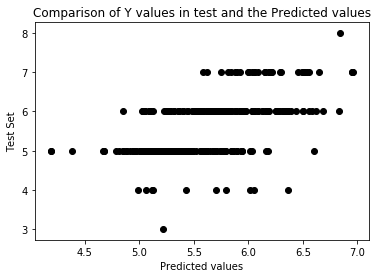

In [17]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_prediction, y_test,  color='black')
plt.show()

In [18]:
#for the second model we consider decision tree regressors, they can handle both categorical and numerical data
#now fit the model into decision tree regressor
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=50)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [19]:
y_prediction = regressor.predict(X_test)
print(y_test[:5])
print("Pred data")
print(y_prediction[:5])

      quality
366         7
1325        6
133         6
1418        5
1258        6
Pred data
[7. 6. 7. 4. 6.]


In [20]:
#calculating RMSE for decision tree
RMSE = sqrt(mean_squared_error(y_true=y_test, y_pred=y_prediction))

In [21]:
print(RMSE)

0.7725768570181222


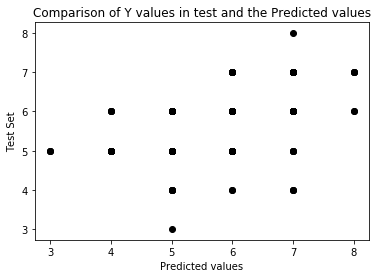

In [23]:
plt.title('Comparison of Y values in test and the Predicted values')
plt.ylabel('Test Set')
plt.xlabel('Predicted values')
plt.scatter(y_prediction, y_test,  color='black')
plt.show()

In [22]:
#comparing both the models, we can see that the linear regression model has a less rmse value than the 
#decision tree model. Therefore, we can tell that the linear regression model performs better than the decision tree model.